In [ ]:
# Projeto Marinha do Brasil

# Autor: Natanael Junior (natmourajr@gmail.com)
# Laboratorio de Processamento de Sinais - UFRJ

In [30]:
import os
import pickle
import numpy as np
import time

init_time = time.time()

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.externals import joblib

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

m_time = time.time()
print 'Time to import all libraries: '+str(m_time-init_time)+' seconds'

outputpath = os.environ['OUTPUTDATAPATH']
main_analysis_path = os.environ['SONAR_WORKSPACE']
analysis_path = outputpath+'/StationarityAnalysis'
pict_path = analysis_path+'/picts'


m_time = time.time()


subfolder = '8classes'
n_pts_fft = 1024
decimation_rate = 3

if(not os.path.exists(outputpath+'/'+'LofarData_%s_%i_fft_pts_%i_decimation_rate.jbl'%(
            subfolder,n_pts_fft,decimation_rate))):
    print outputpath+'/'+'LofarData_%s_%i_fft_pts_%i_decimation_rate.pickle'%(
        subfolder,n_pts_fft,decimation_rate)+' doesnt exist...please create it'
    exit()
    
#Read lofar data
[data,class_labels] = joblib.load(outputpath+'/'+'LofarData_%s_%i_fft_pts_%i_decimation_rate.jbl'%(
            subfolder,n_pts_fft,decimation_rate))
m_time = time.time()-m_time
print 'Time to read data file: '+str(m_time)+' seconds'

Time to import all libraries: 0.00803685188293 seconds
Time to read data file: 40.4753119946 seconds


In [31]:
# Process data...
# create a full data vector
all_data = {};
all_trgt = {};

for iclass, class_label in enumerate(class_labels):
    for irun in range(len(data[iclass])):
        if len(all_data) == 0:
            all_data = data[iclass][irun]['Signal']
            all_trgt = (iclass)*np.ones(data[iclass][irun]['Signal'].shape[1])
        else:
            all_data = np.append(all_data,data[iclass][irun]['Signal'],axis=1)
            all_trgt = np.append(all_trgt,(iclass)*np.ones(data[iclass][irun]
                                                           ['Signal'].shape[1]),axis=0)
            
all_data = all_data.transpose()

# LOFARGram

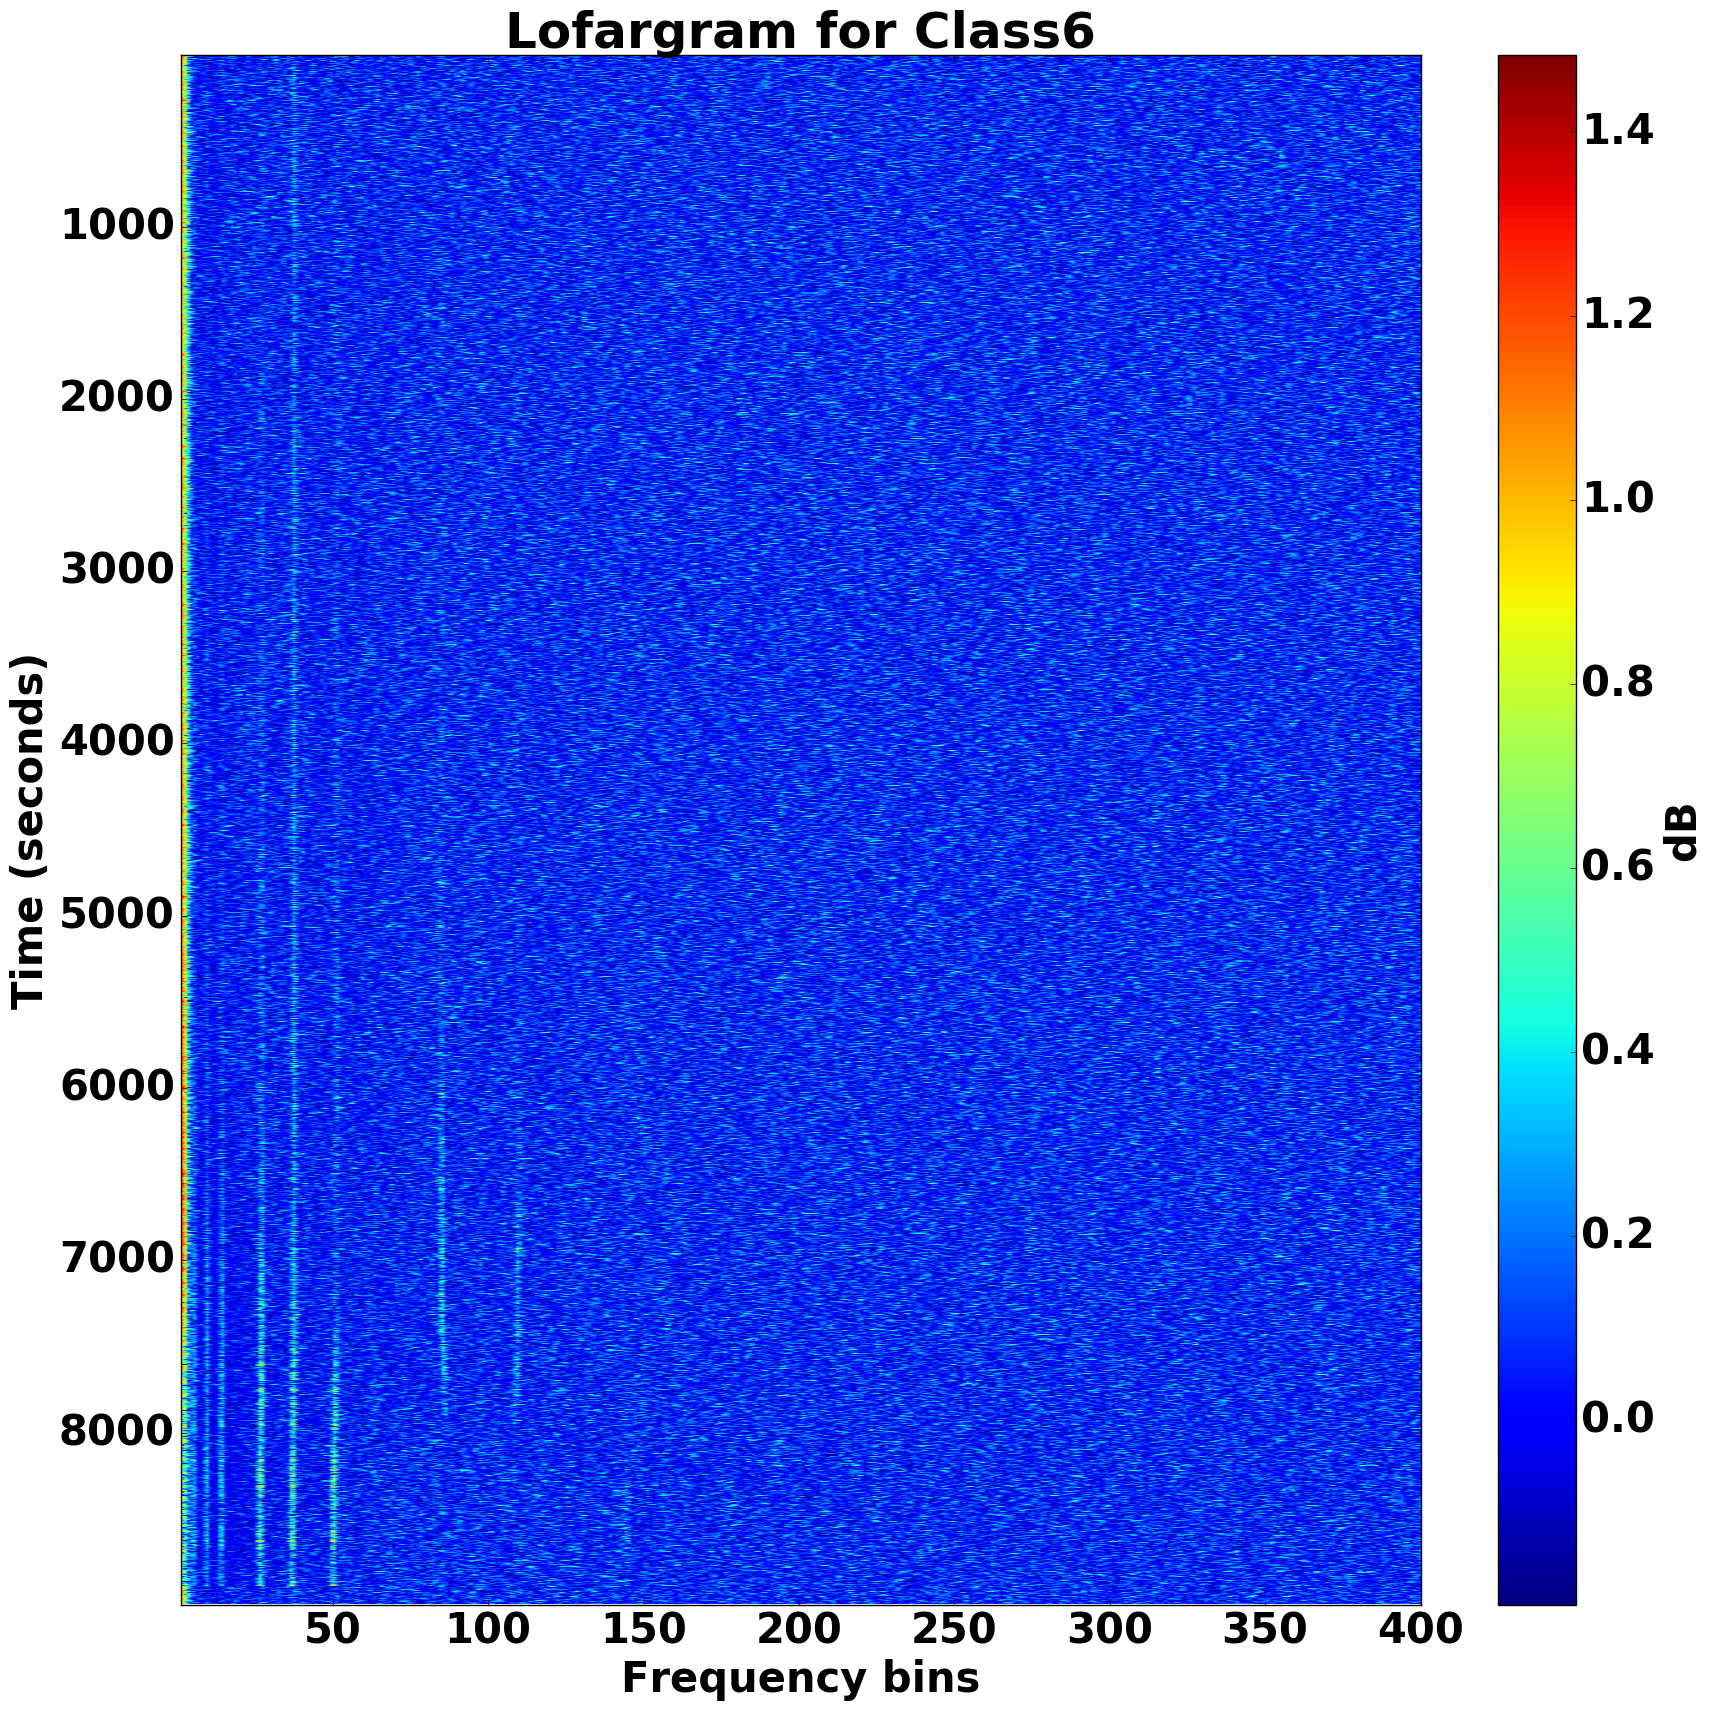

In [35]:
fig= plt.subplots(figsize=(20,20))

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

choose_class = 6
plt.imshow(all_data[all_trgt==choose_class,:],
           cmap="jet",extent=[1, 400, all_data[all_trgt==choose_class,:].shape[0],1],
           aspect="auto")
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB',fontweight='bold') 

plt.title('Lofargram for Class%i'%(choose_class),fontweight='bold')
plt.xlabel('Frequency bins',fontweight='bold')
plt.ylabel('Time (seconds)',fontweight='bold')

# Lofar distributions

Processing Class: ClassA
Processing Class: ClassB
Processing Class: ClassC
Processing Class: ClassD


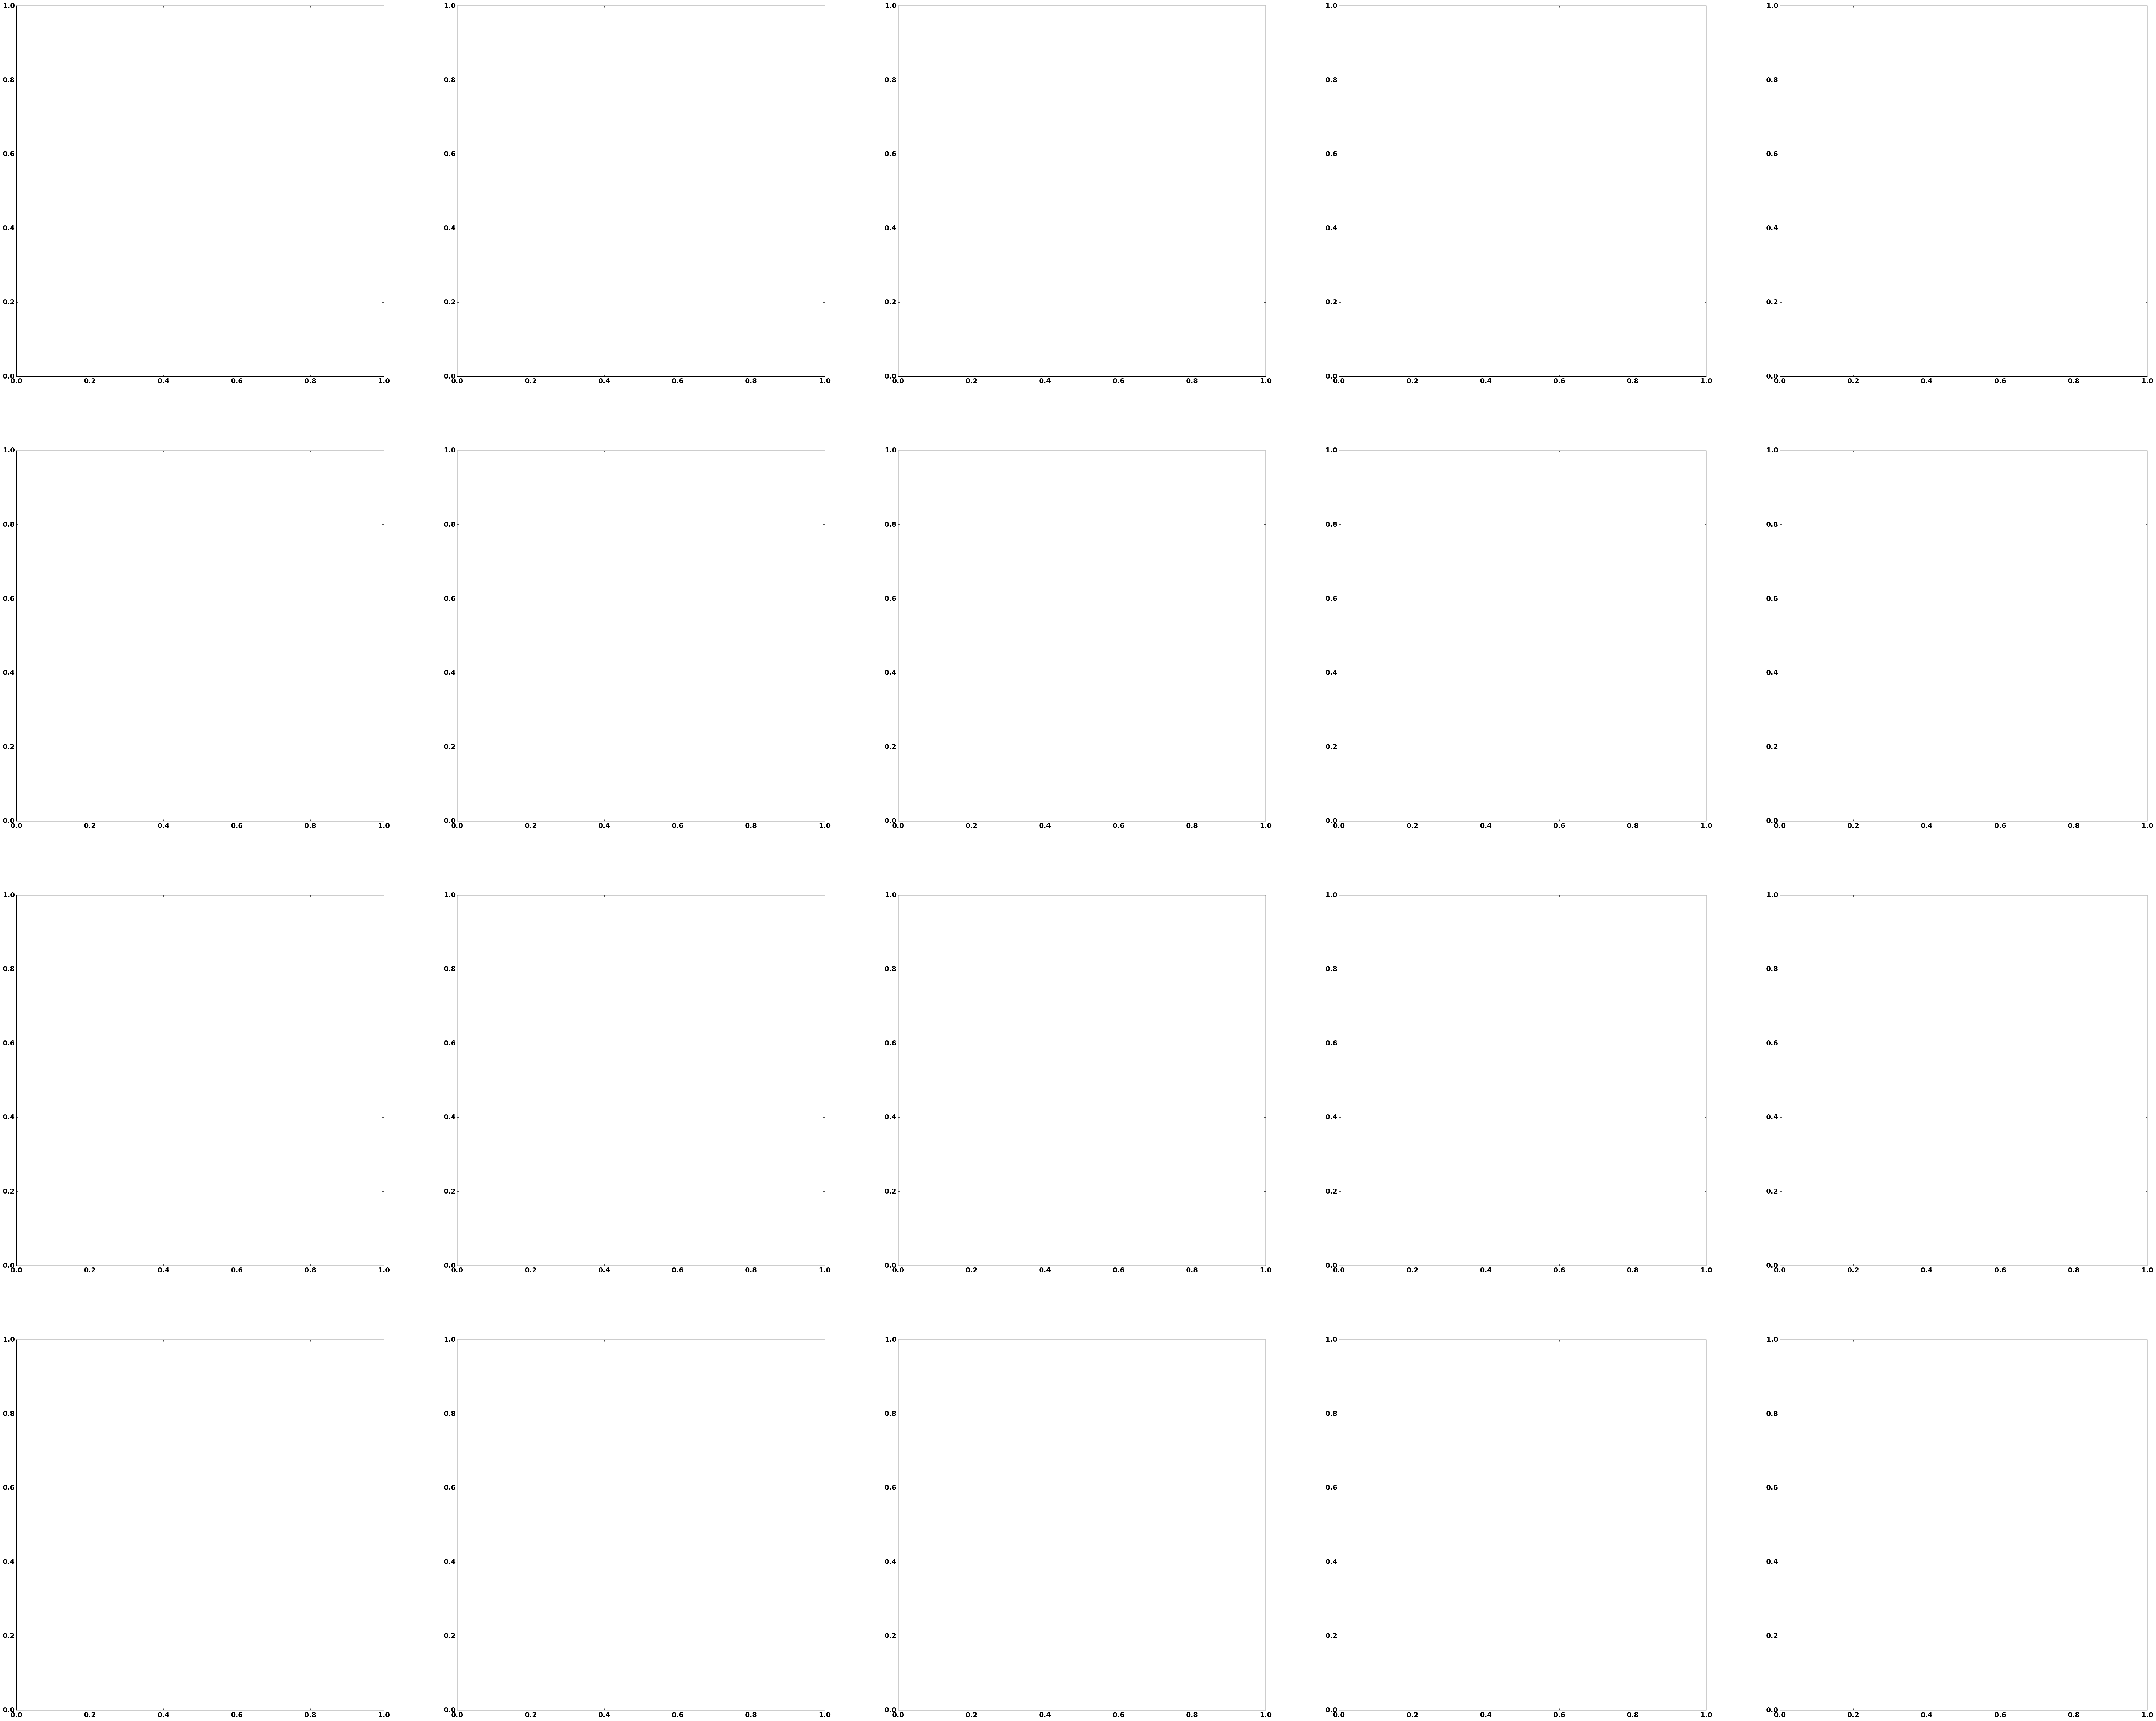

In [9]:
# Show Window Distributions
#from mpl_toolkits.mplot3d import Axes3D
fig, subplot_array = plt.subplots(nrows=4, ncols=5,figsize=(100,80))

m_colors = ['b', 'r', 'g', 'y']

bins = np.linspace(-1,1,200)
ax = {}

for iclass, iclass_label in enumerate(class_labels):
    print 'Processing Class: %s' % (iclass_label)
    
      
